In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 正式打造篇

我們需要決定

* 2 層的神經網路
* 第一層 3 個神經元
* 第二層 10 個神經元
* activation function 是 relu

In [6]:
model = Sequential()

In [7]:
model.add(Dense(3,
               input_dim = 784,
               activation='relu'))

In [8]:
model.add(Dense(10,
               activation='relu'))

In [9]:
model.add(Dense(10,
               activation='softmax'))

### 觀賞一下

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 2355      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 2,505
Trainable params: 2,505
Non-trainable params: 0
_________________________________________________________________


## 組裝、訓練

In [11]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0568 - acc: 0.5362
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0562 - acc: 0.5410
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0556 - acc: 0.5464
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0550 - acc: 0.5519
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0545 - acc: 0.5580
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0538 - acc: 0.5640
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0532 - acc: 0.5735
Epoch 8/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0524 - acc: 0.5845
Epoch 9/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0514 - acc: 0.5942
Epoch 10/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0503 - acc: 0.6028

## 檢視成果

In [14]:
from ipywidgets import interact_manual

In [15]:
predict = model.predict_classes(x_test)

In [16]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [17]:
interact_manual(test, 測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

神經網路預測 6


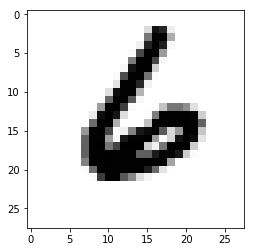

In [20]:
n = 8888
X = x_test[n].reshape(28,28)
print('神經網路預測', predict[n])
plt.imshow(X, cmap='Greys')